In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path=r"C:\Users\luthr\Downloads\archive (1)\red-wine_3.csv"
df = pd.read_csv(file_path)
df.head()


,index1,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,quality rating
0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,2
1,1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,2
2,2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,2
3,3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,2
4,4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,2


In [32]:
df.isnull().sum()

index1                  0
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality rating          0
dtype: int64

In [33]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]


Number of duplicate rows = 0


,index1,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,quality rating


In [34]:
df.drop_duplicates(inplace=True) 

In [35]:
wine_data_cleaned = df.drop(columns=['index1', 'index'])

In [36]:
missing_values = wine_data_cleaned.isnull().sum()

# If there are missing values, impute them (mean imputation used here as an example)
if missing_values.sum() > 0:
    wine_data_cleaned.fillna(wine_data_cleaned.mean(), inplace=True)


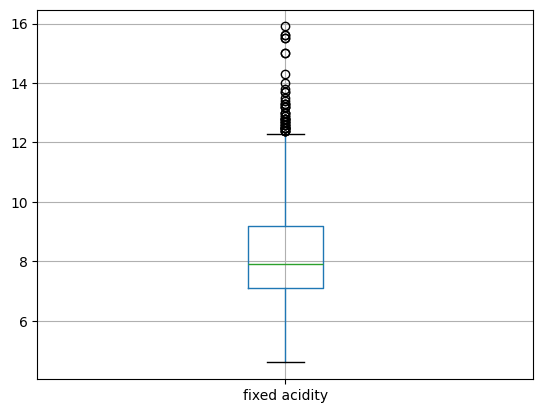

In [37]:
wine_data_cleaned.boxplot(column=['fixed acidity'])
plt.show()

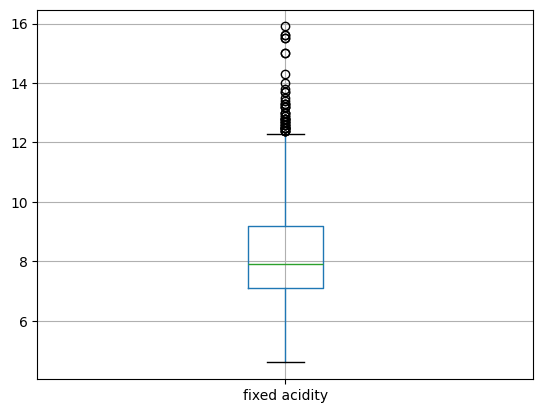

In [38]:
wine_data_cleaned.boxplot(column=['fixed acidity'])
plt.show()

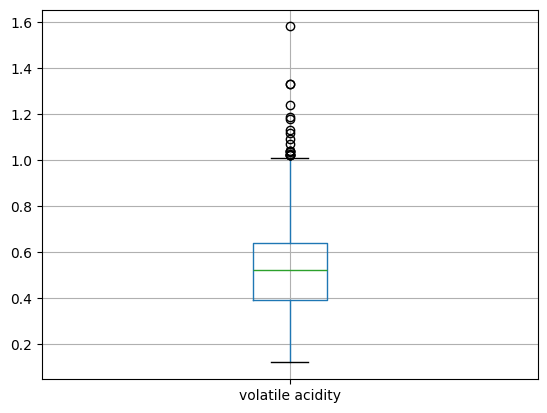

In [39]:
wine_data_cleaned.boxplot(column=['volatile acidity'])
plt.show()

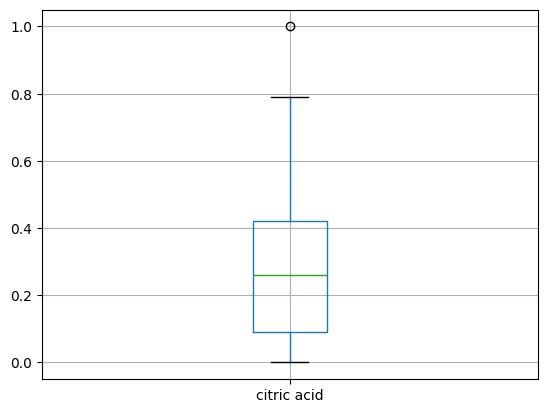

In [40]:
wine_data_cleaned.boxplot(column=['citric acid'])
plt.show()

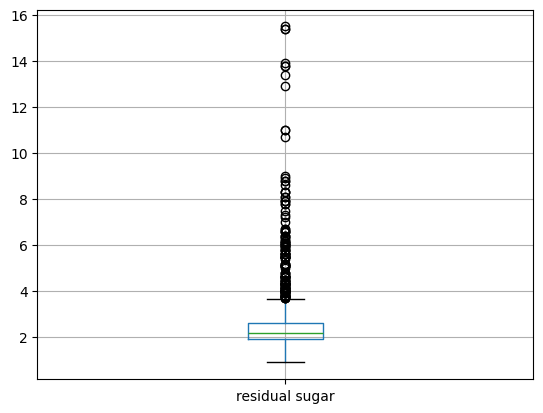

In [41]:
wine_data_cleaned.boxplot(column=['residual sugar'])
plt.show()

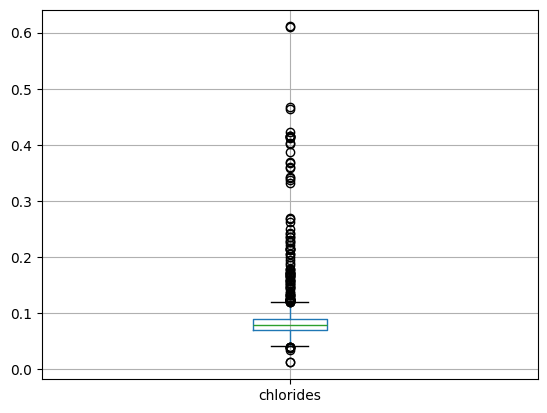

In [42]:
wine_data_cleaned.boxplot(column=['chlorides'])
plt.show()

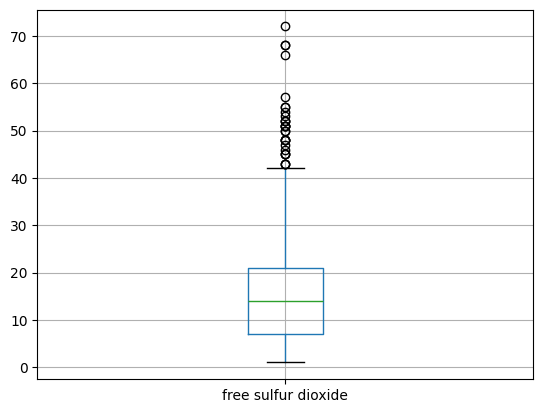

In [43]:
wine_data_cleaned.boxplot(column=['free sulfur dioxide'])
plt.show()

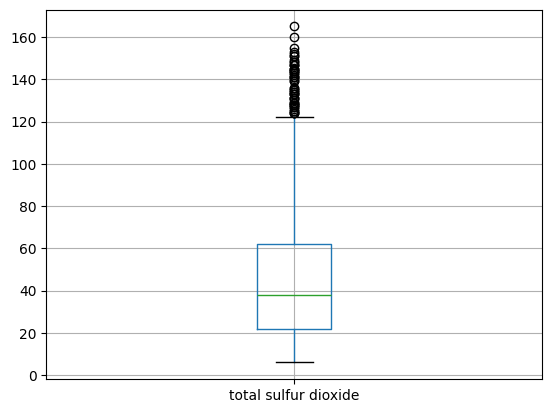

In [44]:
wine_data_cleaned.boxplot(column=['total sulfur dioxide'])
plt.show()

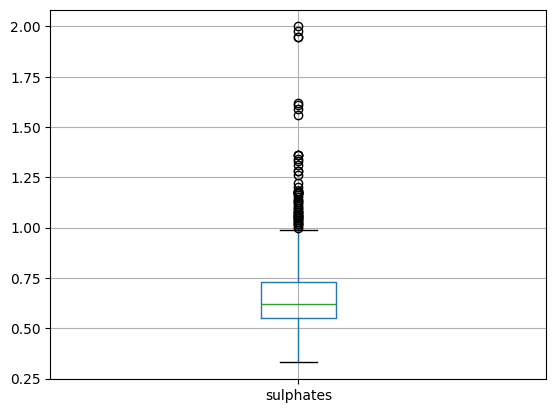

In [45]:
wine_data_cleaned.boxplot(column=['sulphates'])
plt.show()

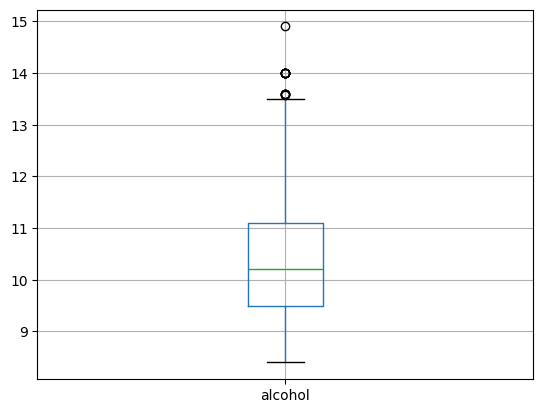

In [46]:
wine_data_cleaned.boxplot(column=['alcohol'])
plt.show()

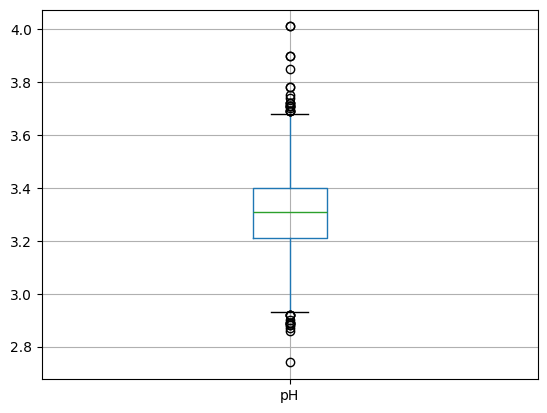

In [47]:
wine_data_cleaned.boxplot(column=['pH'])
plt.show()

In [48]:
def remove_outliers(df, numerical_cols):
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    # Only keep rows that fall within the interquartile range
    filtered_df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

# List of numerical features
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 
                      'sulphates', 'alcohol']

# Remove outliers
wine_data_cleaned = remove_outliers(wine_data_cleaned, numerical_features)


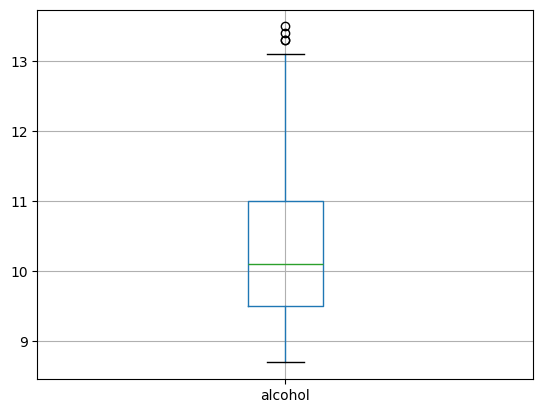

In [49]:
wine_data_cleaned.boxplot(column=['alcohol'])
plt.show()

In [50]:
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 
                      'sulphates', 'alcohol']

# Initialize the StandardScaler
scaler = StandardScaler()
# Scale the numerical features
wine_data_cleaned[numerical_features] = scaler.fit_transform(wine_data_cleaned[numerical_features])
wine_data_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,quality rating
0,-0.519046,1.076074,-1.373094,-0.640333,-0.168500,-0.453140,-0.309768,1.405686,-0.618697,-0.989460,5,2
1,-0.245690,2.168537,-1.373094,0.940192,1.368177,1.134505,0.956007,-0.942160,0.414693,-0.582756,5,2
2,-0.245690,1.440228,-1.151191,0.262824,0.949083,0.000473,0.457368,-0.487738,0.156345,-0.582756,5,2
3,2.077838,-1.473006,1.733547,-0.640333,-0.238349,0.227280,0.687509,-1.245108,-0.446465,-0.582756,6,2
4,-0.519046,1.076074,-1.373094,-0.640333,-0.168500,-0.453140,-0.309768,1.405686,-0.618697,-0.989460,5,2


In [51]:
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True to avoid dummy variable trap
print(df_encoded.shape)
df_encoded = pd.get_dummies(df, columns=['quality'], drop_first=True)


(1599, 14)


In [52]:
print(df_encoded.head())

   index1  index  fixed acidity  volatile acidity  citric acid  \
0       0      0            7.4              0.70         0.00   
1       1      1            7.8              0.88         0.00   
2       2      2            7.8              0.76         0.04   
3       3      3           11.2              0.28         0.56   
4       4      4            7.4              0.70         0.00   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide    pH  \
0             1.9      0.076                 11.0                  34.0  3.51   
1             2.6      0.098                 25.0                  67.0  3.20   
2             2.3      0.092                 15.0                  54.0  3.26   
3             1.9      0.075                 17.0                  60.0  3.16   
4             1.9      0.076                 11.0                  34.0  3.51   

   sulphates  alcohol  quality rating  quality_4  quality_5  quality_6  \
0       0.56      9.4               2     

In [53]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # Importing the necessary function
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X = wine_data_cleaned.drop(columns=['quality rating'])  # Adjust based on your target column
y = wine_data_cleaned['quality rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Multiple Regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)

print("\nMultiple Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_multiple))
print("R²:", r2_score(y_test, y_pred_multiple))




Multiple Regression Metrics:
MSE: 0.05568332828923188
R²: 0.6143146092520735


In [55]:
from sklearn.metrics import (
    accuracy_score, precision_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

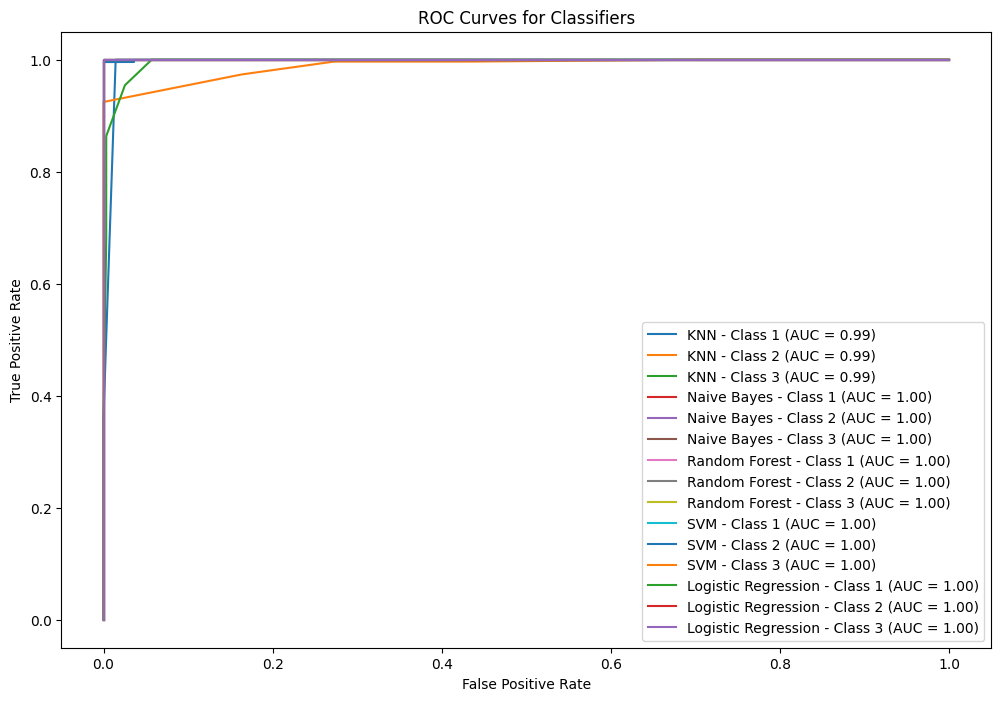

Performance Metrics:
                     Accuracy  Precision       AUC
KNN                  0.955556   0.957028  0.990100
Naive Bayes          0.988889   0.989033  0.999949
Random Forest        1.000000   1.000000  1.000000
SVM                  0.991667   0.991748  0.999899
Logistic Regression  1.000000   1.000000  1.000000


In [56]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Binarize the labels for multiclass classification
if len(np.unique(y_train)) > 2:
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
else:
    y_test_binarized = y_test

# Train and evaluate each classifier
results = {}
plt.figure(figsize=(12, 8))

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_scaled, y_train)
    
    # Predictions and probabilities
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test_scaled)
    else:
        decision_scores = clf.decision_function(X_test_scaled)
        if len(np.unique(y_train)) > 2:
            # Normalize decision function scores for multiclass
            y_prob = np.exp(decision_scores) / np.sum(np.exp(decision_scores), axis=1, keepdims=True)
        else:
            y_prob = decision_scores  # For binary classification
    
    # Metrics
    acc = accuracy_score(y_test, clf.predict(X_test_scaled))
    prec = precision_score(y_test, clf.predict(X_test_scaled), average='weighted')
    
    if len(np.unique(y_train)) > 2:
        auc_score = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr', average='weighted')
    else:
        auc_score = roc_auc_score(y_test, y_prob[:, 1] if y_prob.ndim > 1 else y_prob)
    
    results[name] = {"Accuracy": acc, "Precision": prec, "AUC": auc_score}
    
    # ROC Curve for binary or multiclass classification
    if len(np.unique(y_train)) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1] if y_prob.ndim > 1 else y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    else:
        for i, class_label in enumerate(np.unique(y_train)):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f"{name} - Class {class_label} (AUC = {auc_score:.2f})")

# Final ROC Curve
plt.title("ROC Curves for Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Display results
results_df = pd.DataFrame(results).T
print("Performance Metrics:")
print(results_df)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.90      0.90      0.90        10
           5       0.66      0.66      0.66       130
           6       0.66      0.66      0.66       132
           7       0.88      0.86      0.87        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.52      0.51      0.51       320
weighted avg       0.68      0.68      0.68       320



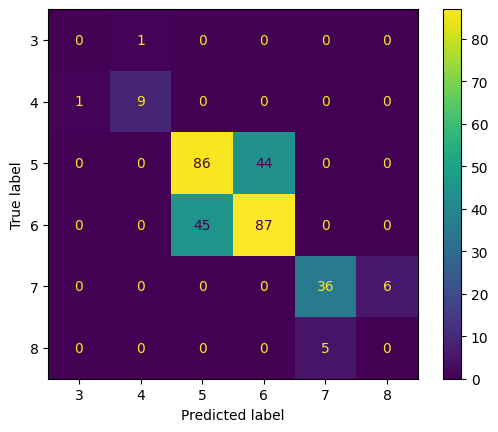

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf_model.predict(X_test_scaled)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Random Forest Accuracy: 0.78
